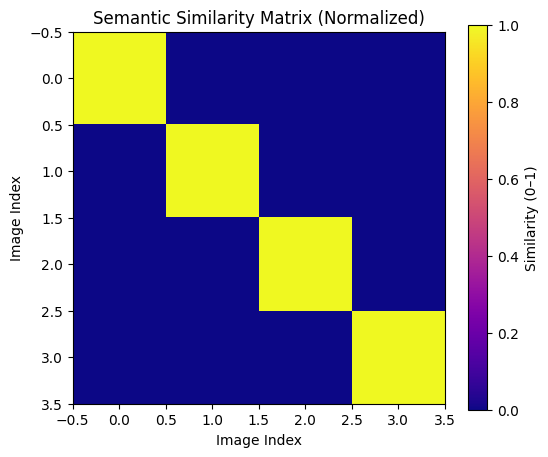

✅ Saved semantic_similarity.npy


In [1]:
# ============================================
# 02_semantic_similarity.ipynb
# Building semantic similarity matrix from hierarchical labels
# ============================================

import numpy as np
import matplotlib.pyplot as plt
import os

# --- Load labels ---
labels = np.load("../data/kay_labels.npy", allow_pickle=True)

def compute_label_similarity(labels, weights=[4, 3, 2, 1]):
    """
    Compute semantic similarity matrix based on label overlap.
    Each image has 4 hierarchical labels.
    """
    n_images = labels.shape[0]
    sim_matrix = np.zeros((n_images, n_images))
    for i in range(n_images):
        for j in range(n_images):
            score = sum(weights[k] for k in range(4) if labels[i, k] == labels[j, k])
            sim_matrix[i, j] = score
    return sim_matrix

# --- Compute and normalize ---
semantic_sim = compute_label_similarity(labels)
semantic_sim /= np.max(semantic_sim)

# --- Visualize ---
plt.figure(figsize=(6, 5))
plt.imshow(semantic_sim, cmap='plasma')
plt.title("Semantic Similarity Matrix (Normalized)")
plt.colorbar(label="Similarity (0–1)")
plt.xlabel("Image Index")
plt.ylabel("Image Index")
plt.show()

# --- Save for later use ---
np.save("../data/semantic_similarity.npy", semantic_sim)
print("✅ Saved semantic_similarity.npy")